In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
results = pd.read_csv("workspace/exported_models/ssd_resnet152_v1_fpn_640x640_coco17_tpu-8/validation_results.csv")
results

,image,time,boxes,best,best_class,class_present,class_score
0,2357 brick corner 1x2x2 000L.jpg,13310.415,"[[128, 193, 503, 531, '3040 roof tile 1x2', 0....",0.804747,3040 roof tile 1x2,False,NaN
1,2357 brick corner 1x2x2 002L.jpg,875.453,"[[117, 179, 540, 517, '3040 roof tile 1x2', 0....",0.834143,3040 roof tile 1x2,False,NaN
2,2357 brick corner 1x2x2 011R.jpg,986.436,"[[151, 165, 502, 490, '3040 roof tile 1x2', 0....",0.746529,3040 roof tile 1x2,False,NaN
3,2357 brick corner 1x2x2 046R.jpg,927.355,"[[172, 127, 459, 480, '3040 roof tile 1x2', 0....",0.519900,3040 roof tile 1x2,False,NaN
4,2357 brick corner 1x2x2 052R.jpg,873.649,"[[167, 173, 469, 491, '3040 roof tile 1x2', 0....",0.562494,3040 roof tile 1x2,False,NaN
...,...,...,...,...,...,...,...
245,99301 roof tile inside 3x3 001L.jpg,378.787,"[[155, 0, 638, 640, '4286 roof tile 1x3', 0.90...",0.907824,4286 roof tile 1x3,False,NaN
246,99301 roof tile inside 3x3 004R.jpg,413.763,"[[53, 69, 562, 551, '3040 roof tile 1x2', 0.91...",0.912079,3040 roof tile 1x2,False,NaN
247,99301 roof tile inside 3x3 005L.jpg,372.519,"[[0, 76, 631, 609, '4286 roof tile 1x3', 0.928...",0.928684,4286 roof tile 1x3,False,NaN
248,99301 roof tile inside 3x3 022R.jpg,381.306,"[[0, 2, 638, 591, '3659 brick bow 1x4', 0.9577...",0.957773,3659 brick bow 1x4,False,NaN


In [4]:
results["original_class"] = results["image"].apply(lambda z: z[:-9])

In [25]:
results["class_is_best"] = results["best_class"] == results["original_class"]

In [26]:
results

,image,time,boxes,best,best_class,class_present,class_score,original_class,class_is_best
0,2357 brick corner 1x2x2 000L.jpg,13310.415,"[[128, 193, 503, 531, '3040 roof tile 1x2', 0....",0.804747,3040 roof tile 1x2,False,NaN,2357 brick corner 1x2x2,False
1,2357 brick corner 1x2x2 002L.jpg,875.453,"[[117, 179, 540, 517, '3040 roof tile 1x2', 0....",0.834143,3040 roof tile 1x2,False,NaN,2357 brick corner 1x2x2,False
2,2357 brick corner 1x2x2 011R.jpg,986.436,"[[151, 165, 502, 490, '3040 roof tile 1x2', 0....",0.746529,3040 roof tile 1x2,False,NaN,2357 brick corner 1x2x2,False
3,2357 brick corner 1x2x2 046R.jpg,927.355,"[[172, 127, 459, 480, '3040 roof tile 1x2', 0....",0.519900,3040 roof tile 1x2,False,NaN,2357 brick corner 1x2x2,False
4,2357 brick corner 1x2x2 052R.jpg,873.649,"[[167, 173, 469, 491, '3040 roof tile 1x2', 0....",0.562494,3040 roof tile 1x2,False,NaN,2357 brick corner 1x2x2,False
...,...,...,...,...,...,...,...,...,...
245,99301 roof tile inside 3x3 001L.jpg,378.787,"[[155, 0, 638, 640, '4286 roof tile 1x3', 0.90...",0.907824,4286 roof tile 1x3,False,NaN,99301 roof tile inside 3x3,False
246,99301 roof tile inside 3x3 004R.jpg,413.763,"[[53, 69, 562, 551, '3040 roof tile 1x2', 0.91...",0.912079,3040 roof tile 1x2,False,NaN,99301 roof tile inside 3x3,False
247,99301 roof tile inside 3x3 005L.jpg,372.519,"[[0, 76, 631, 609, '4286 roof tile 1x3', 0.928...",0.928684,4286 roof tile 1x3,False,NaN,99301 roof tile inside 3x3,False
248,99301 roof tile inside 3x3 022R.jpg,381.306,"[[0, 2, 638, 591, '3659 brick bow 1x4', 0.9577...",0.957773,3659 brick bow 1x4,False,NaN,99301 roof tile inside 3x3,False


In [27]:
agg_dict = {
    "class_present": lambda z: z.sum(),
    "class_is_best": lambda z: z.sum()
}
grouped = results.groupby("original_class", as_index=False).agg(agg_dict)

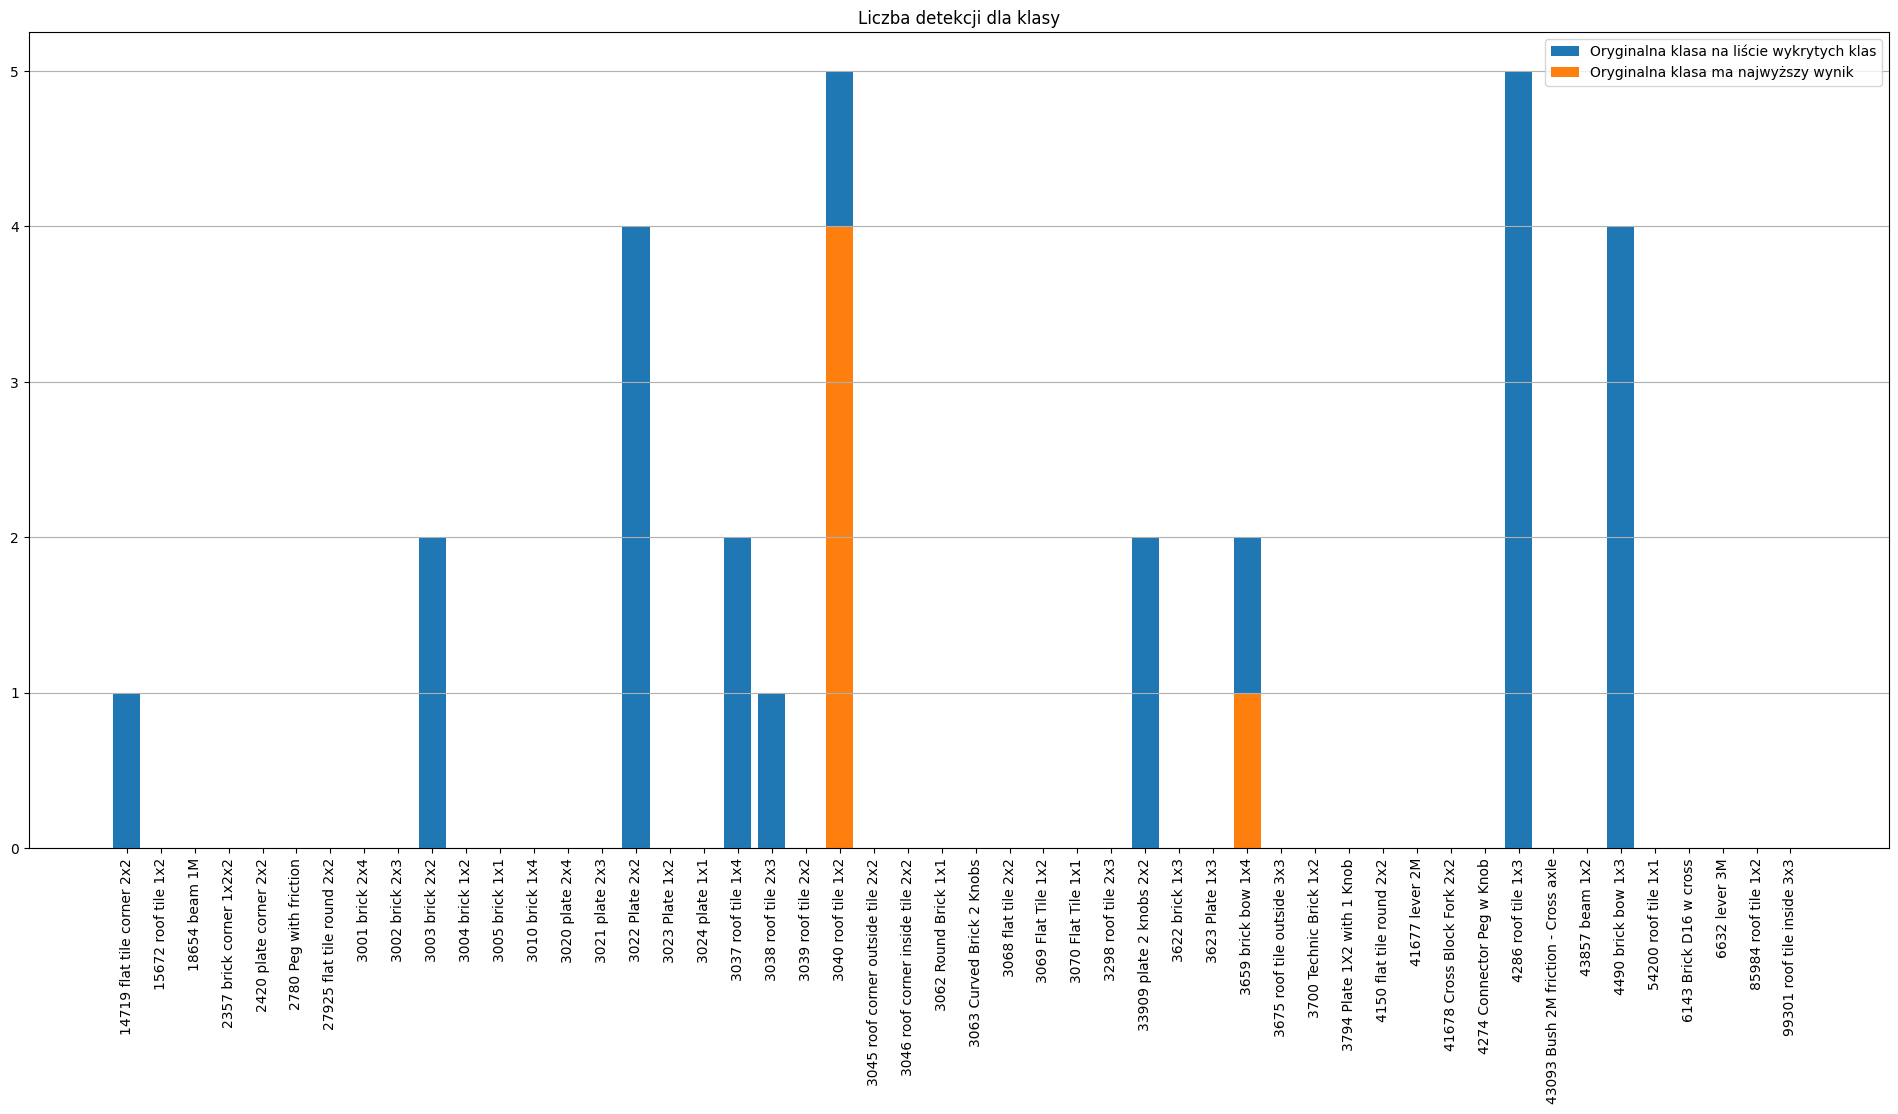

In [33]:
figure = plt.figure(figsize=(24,12))
plt.title("Liczba detekcji dla klasy")
bar1 = plt.bar(grouped['original_class'], grouped['class_present'], label="Oryginalna klasa na liście wykrytych klas")
bar2 = plt.bar(grouped['original_class'], grouped['class_is_best'], label="Oryginalna klasa ma najwyższy wynik")
plt.legend(handles=[bar1,bar2])
figure.autofmt_xdate(rotation=90, ha='center')
plt.grid(axis='y')
plt.show()